In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('BaseOrdinal.csv')
ordinal.shape

(2580, 83)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinal.shape

(2580, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
cb = CatBoostRegressor(random_state=1, verbose=False)

In [6]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, cv=cv, n_jobs=-1)
    
    #scores = cross_validate(model, X, y, scoring=scoring, 
    #                              cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [7]:
cat = evaluate_model(cb, X, y)

In [8]:
cat

,fit_time,score_time,test_score
0,5.674250,0.007747,0.926950
1,5.933031,0.006135,0.898789
2,5.766871,0.007976,0.936517
3,10.184697,0.021498,0.929022
4,5.845187,0.010181,0.950638
5,5.953225,0.004081,0.936688
6,5.865682,0.011672,0.942846
7,6.001782,0.010883,0.926769
8,5.553513,0.006592,0.945508
9,5.536481,0.005095,0.884738


In [9]:
cat = cat[['test_score']].rename(columns={'test_score':'cat_score'})

In [10]:
cat

,cat_score
0,0.926950
1,0.898789
2,0.936517
3,0.929022
4,0.950638
5,0.936688
6,0.942846
7,0.926769
8,0.945508
9,0.884738


In [11]:
ordinald1 = pd.read_csv('OrdinalDropIF309.csv')
ordinald1.shape

(2579, 83)

In [12]:
ordinald1 = ordinald1.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinald1.shape

(2579, 80)

In [13]:
Xd1 = ordinald1.drop(['SalePrice'], axis=1)
yd1 = ordinald1.SalePrice

In [14]:
catd1 = evaluate_model(cb, Xd1, yd1)

In [15]:
catd1

,fit_time,score_time,test_score
0,6.297349,0.009852,0.931308
1,7.948471,0.007470,0.946897
2,6.082537,0.009850,0.946280
3,6.255290,0.009107,0.911824
4,6.004202,0.010968,0.949900
5,5.992261,0.005088,0.933133
6,5.939277,0.007326,0.929582
7,6.049856,0.011488,0.926053
8,5.546627,0.004696,0.950737
9,5.592979,0.004163,0.939564


In [16]:
catd1 = catd1[['test_score']].rename(columns={'test_score':'catd1_score'})

In [17]:
catd1

,catd1_score
0,0.931308
1,0.946897
2,0.946280
3,0.911824
4,0.949900
5,0.933133
6,0.929582
7,0.926053
8,0.950737
9,0.939564


In [18]:
ordinalIF3 = pd.read_csv('OrdinalDropIF50_309_2004.csv')
ordinalIF3.shape

(2577, 83)

In [19]:
ordinalIF3 = ordinalIF3.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinalIF3.shape

(2577, 80)

In [20]:
XIF3 = ordinalIF3.drop(['SalePrice'], axis=1)
yIF3 = ordinalIF3.SalePrice

In [21]:
catIF3 = evaluate_model(cb, XIF3, yIF3)

In [22]:
catIF3

,fit_time,score_time,test_score
0,5.679857,0.005985,0.934448
1,9.867493,0.025616,0.933621
2,5.547652,0.008925,0.927127
3,5.726764,0.007851,0.936618
4,5.654681,0.008142,0.953819
5,5.665198,0.009709,0.921287
6,9.972085,0.027737,0.936286
7,5.843948,0.005249,0.938454
8,5.161831,0.008263,0.944855
9,5.210808,0.003732,0.953311


In [23]:
catIF3 = catIF3[['test_score']].rename(columns={'test_score':'catIF1_score'})

In [24]:
catIF3

,catIF1_score
0,0.934448
1,0.933621
2,0.927127
3,0.936618
4,0.953819
5,0.921287
6,0.936286
7,0.938454
8,0.944855
9,0.953311


In [25]:
combo = pd.concat([cat, catd1, catIF3], axis=1)

In [26]:
combo

,cat_score,catd1_score,catIF1_score
0,0.926950,0.931308,0.934448
1,0.898789,0.946897,0.933621
2,0.936517,0.946280,0.927127
3,0.929022,0.911824,0.936618
4,0.950638,0.949900,0.953819
5,0.936688,0.933133,0.921287
6,0.942846,0.929582,0.936286
7,0.926769,0.926053,0.938454
8,0.945508,0.950737,0.944855
9,0.884738,0.939564,0.953311


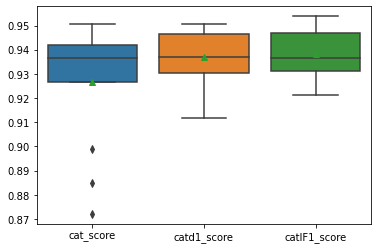

In [27]:
sns.boxplot(data=combo, showmeans=True);

In [28]:
combo.describe()

,cat_score,catd1_score,catIF1_score
count,15.000000,15.000000,15.000000
mean,0.926683,0.936878,0.938301
std,0.023191,0.011131,0.009981
min,0.872051,0.911824,0.921287
25%,0.926860,0.930445,0.931066
50%,0.936517,0.936986,0.936618
75%,0.942064,0.946589,0.946927
max,0.950638,0.950737,0.953819
